# 1. Colleting or Loading The Dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df["target"] = iris.target                                     # Adding column for Label
df["target_names"] = iris.target_names[iris.target]

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# 2. Feature Engineering(Data Preparation or Preprocessing)

In [7]:
from sklearn.preprocessing import StandardScaler

X = df.drop(["target", "target_names"], axis=1).values         # Feature
y = df["target"]                                               # Label

scaler = StandardScaler()                                     
X = scaler.fit_transform(X)                                    # Standardization Of Feature

# 3. Splitting the Dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52, test_size=0.2)      # Dataset Splitted in Training and Testing Dataset

# 4. Model Creation

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# 5. Hyperparameter Tuning with Grid Search

In [13]:
from sklearn.model_selection import  GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)

# 6. Model Training

In [15]:
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print()
best_model = grid_search.best_estimator_
print()
print("Model choosen:",best_model)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


Model choosen: RandomForestClassifier(min_samples_split=10, n_estimators=50)


# 7. Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score

# Checking Accuracy to check Overfitting
train_accuracy = best_model.score(X_train, y_train)*100       # Get accuracy on the training data
print(f"Training Accuracy: {train_accuracy:.2f}%")

y_pred = best_model.predict(X_test)                           # Predict on the test data
print() 

test_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Test Accuracy: {test_accuracy:.2f}%")                 # Calculate accuracy on the test data 

Training Accuracy: 98.33%

Test Accuracy: 96.67%


# 8. Model Prediction

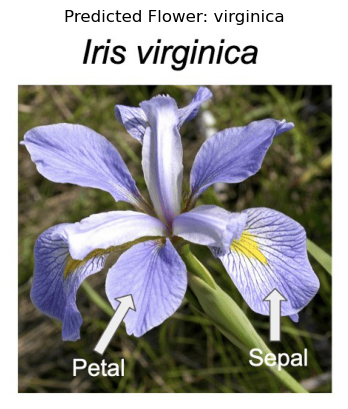

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

# Use fixed values instead of user input
a, b, c, d = 6.5, 5.6, 4.3, 3.4

i = best_model.predict([[a, b, c, d]])[0]

# Display the flower image
flower_images = {
    0: "setosa.jpg",
    1: "versicolor.jpg",
    2: "virginica.jpg"
}

predicted_flower = iris.target_names[i]
image_path = flower_images[i]

# Open and display the image
image = Image.open(image_path)

# Use matplotlib to display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title(f"Predicted Flower: {predicted_flower}")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

a = float(input("Sepal length: "))
b = float(input("Sepal width: "))
c = float(input("Petal length: "))
d = float(input("Petal width: "))

i = best_model.predict([[a, b, c, d]])[0]

# Display the flower image
flower_images = {
    0: "setosa.jpg",
    1: "versicolor.jpg",
    2: "virginica.jpg"
}

predicted_flower = iris.target_names[i]
image_path = flower_images[i]

# Open and display the image
image = Image.open(image_path)

# Use matplotlib to display the image in the notebook
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title(f"Predicted Flower: {predicted_flower}")
plt.show()